<a href="https://colab.research.google.com/github/jvanelteren/housing/blob/master/Rent_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#make train and test datasets. Splitting labels and features happens later
path_train = "https://raw.githubusercontent.com/jvanelteren/housing/master/datasets/train.csv"
path_test = "https://raw.githubusercontent.com/jvanelteren/housing/master/datasets/test.csv"

train = pd.read_csv(path_train)
final_test = pd.read_csv(path_test)
print(train.shape, final_test.shape)
print(train.columns)
train.head()

(1460, 81) (1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
import aoc
aoc.nan_inspect(train)

1       2
2      16
3     132
4     635
5     501
6      58
7       5
8       5
9      32
10     60
11      7
14      3
15      4
dtype: int64


,total,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
PoolQC,1.00,1.00,0.96,0.93,0.81,0.47,0.18,0.06,0.06,0.06,0.06,0.06,0.03,0.03,0.03,0.03,0.03,0.01,0.01,0.0
MiscFeature,0.96,0.96,0.96,0.90,0.79,0.45,0.17,0.05,0.05,0.05,0.05,0.05,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.0
Alley,0.94,0.93,0.90,0.94,0.76,0.43,0.17,0.05,0.05,0.05,0.05,0.05,0.03,0.03,0.02,0.02,0.02,0.00,0.00,0.0
Fence,0.81,0.81,0.79,0.76,0.81,0.37,0.14,0.04,0.04,0.04,0.04,0.04,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.0
FireplaceQu,0.47,0.47,0.45,0.43,0.37,0.47,0.06,0.05,0.05,0.05,0.05,0.05,0.02,0.02,0.02,0.02,0.02,0.00,0.00,0.0
LotFrontage,0.18,0.18,0.17,0.17,0.14,0.06,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
GarageType,0.06,0.06,0.05,0.05,0.04,0.05,0.00,0.06,0.06,0.06,0.06,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
GarageYrBlt,0.06,0.06,0.05,0.05,0.04,0.05,0.00,0.06,0.06,0.06,0.06,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
GarageFinish,0.06,0.06,0.05,0.05,0.04,0.05,0.00,0.06,0.06,0.06,0.06,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
GarageQual,0.06,0.06,0.05,0.05,0.04,0.05,0.00,0.06,0.06,0.06,0.06,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


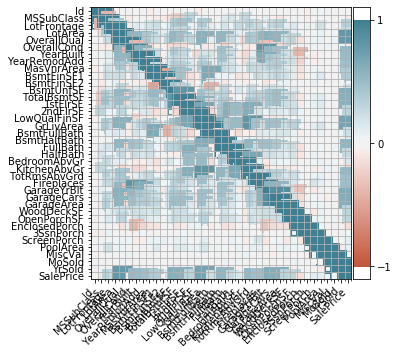

In [28]:
import heatmap
from heatmap import heatmap, corrplot
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 5))
corrplot(train.corr())

### Dataset creation

In [5]:
y_col = (set(train.columns) - set(final_test.columns)).pop()
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    train.loc[:,final_test.columns],train.loc[:,y_col], test_size=0.33, random_state=42) 
ds = (train_x,test_x,train_y,test_y)
for d in ds: print(d.shape)

(978, 80)
(482, 80)
(978,)
(482,)


### Preprocessing

In [16]:
from sklearn.impute import SimpleImputer
# todo multivariate imputation, possibly with pipelines for numeric and categorical data

from sklearn.preprocessing import MinMaxScaler
# https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
# https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler/51237727
# don't know features are normal so just going with minmax scalar atm

from sklearn.preprocessing import OneHotEncoder
#https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki
#The crux of it is that the sklearn encoder creates a function which persists and can then be applied to new data sets which use the same categorical variables, with consistent results.
# So don't use pandas get dummies, but a OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

# We create the preprocessing pipelines for both numeric and categorical data.
num_x = [col for col in final_test.columns if final_test[col].dtype != 'object']
numeric_transformer = Pipeline(steps=[
    ('impute_num', SimpleImputer(strategy='median')),
    ('scale_num', MinMaxScaler())])

cat_x = [col for col in final_test.columns if final_test[col].dtype == 'object']
categorical_transformer = Pipeline(steps=[
    ('impute_cat', SimpleImputer(strategy='most_frequent')),
    ('onehot_cat', OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, num_x),
        ('category', categorical_transformer, cat_x)])

### Modeling

In [33]:

from catboost import CatBoostRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import Ridge,Lasso,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb

models = [('ridge',Ridge(alpha=.5)),
            ('lin',LinearRegression()),
            ('svm',svm.SVR()),
            ('lasso',Lasso()),
            ('SGDRegressor',SGDRegressor()),
            ('KNeighborsRegressor',KNeighborsRegressor()),
            ('RandomForestClassifier',RandomForestClassifier()),
            ('KernelRidge',KernelRidge()),
            ('CatBoostRegressor',CatBoostRegressor(silent=True)),
            ('xgb.XGBRegressor',xgb.XGBRegressor()),
            # ('HistGradientBoostingRegressor',HistGradientBoostingRegressor()),
            ('MLPRegressor',MLPRegressor())
]
def get_fitted_pipeline(name,model):
    return Pipeline([('preprocess', preprocessor),
                   (name,model)]).fit(train_x,train_y)

for name, model in models:
    pipe = get_fitted_pipeline(name,model)
    print(name, pipe.score(train_x,train_y),pipe.score(test_x,test_y))
    



ridge 0.926574161969825 0.8673667872020978
lin 0.9375056616880637 0.8756644835623958
svm -0.04431226631317853 -0.03332733558369605
lasso 0.93747461950937 0.8839802040286716
SGDRegressor 0.8998079085134921 0.8437679999051686
KNeighborsRegressor 0.8045937221245534 0.7539826723093639
RandomForestClassifier 0.9979550102249489 0.002074688796680498
KernelRidge 0.9216193706659801 0.8609381769014147
CatBoostRegressor 0.9955121872098575 0.8789413370499174
xgb.XGBRegressor 0.9998499204546086 0.8701150666653976
MLPRegressor -5.207508096984286 -4.093820275857649


In [18]:
pipe = get_fitted_pipeline('lasso',Lasso())
pipe.get_params().keys()
https://stackoverflow.com/questions/50164001/multiple-column-row-facet-wrap-in-altair#

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'lasso', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__numeric', 'preprocess__category', 'preprocess__numeric__memory', 'preprocess__numeric__steps', 'preprocess__numeric__verbose', 'preprocess__numeric__impute_num', 'preprocess__numeric__scale_num', 'preprocess__numeric__impute_num__add_indicator', 'preprocess__numeric__impute_num__copy', 'preprocess__numeric__impute_num__fill_value', 'preprocess__numeric__impute_num__missing_values', 'preprocess__numeric__impute_num__strategy', 'preprocess__numeric__impute_num__verbose', 'preprocess__numeric__scale_num__copy', 'preprocess__numeric__scale_num__feature_range', 'preprocess__category__memory', 'preprocess__category__steps', 'preprocess__category__verbose', 'preprocess__category__impute_cat', 'preprocess__category__onehot_cat', 'preprocess__category__impu

In [20]:
from sklearn.model_selection import GridSearchCV

hyperparameters = { 'preprocess__category__impute_cat__strategy': ['most_frequent','constant'],
                    'preprocess__numeric__impute_num__strategy': ['mean','median'],
                  }
clf = GridSearchCV(pipe, hyperparameters, cv=5)
 
# Fit and tune model
clf.fit(train_x, train_y)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('impute_num',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
               

In [29]:
import altair as alt
url = path_train

alt.Chart(url).mark_point().encode(
    x='OverallQual:Q',
    y='SalePrice:Q'
)

alt.Chart(...)

LR 0.692494180886


C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LDA 0.694641997216
KNN 0.689191180963
CART 0.67097587671
RFC 0.692412494851
NB 0.118818838161
SVM 0.694682515854


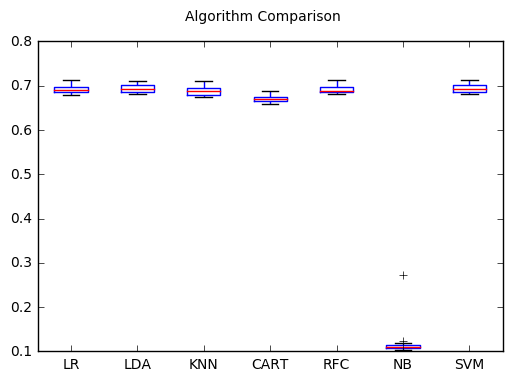

In [0]:
import sklearn.pipeline
from sklearn.preprocessing import Imputer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


results = []
names = []
scoring = 'accuracy'
for name, model in models:
  steps = [
    #('imputing', imp),
    (name, model)]

  pipeline = sklearn.pipeline.Pipeline(steps)

  #X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(features_train, labels_train, test_size=0.33, random_state=42)

  #fit your pipeline on X_train and y_train
  #pipeline.fit( X_train, y_train )
  #call pipeline.predict() on your X_test data to make a set of test predictions
  #y_prediction = pipeline.predict( X_test )
  #test your predictions using sklearn.classification_report()
  #report = sklearn.metrics.classification_report( y_test, y_prediction )
  #print (report)

  from sklearn import cross_validation
  kfold = KFold(len(labels_train),n_folds=20, random_state=4)
  cv_results = cross_validation.cross_val_score(pipeline,features_train, labels_train, cv=kfold,scoring=scoring)
  print (name, cv_results.mean())
  results.append(cv_results)
  names.append(name)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()